In [1]:
import pandas as pd
df_playlist = pd.read_csv("../data/track_playlist_association.csv")
df_tracks = pd.read_csv("../data/matched_songs.csv")

In [18]:
import numpy as np
from scipy.sparse.linalg import svds

# Define the original matrix R
R = np.array([[1, 0, 1, 0],
              [0, 1, 0, 1],
              [1, 1, 0, 0]], dtype=np.float32)

# Perform Singular Value Decomposition (SVD)
# We decompose R into U, Sigma, V^T
U, Sigma, Vt = svds(R, k=2)  # k=2 for the top 2 singular values

# Reconstruct the predicted ratings matrix (hat{R}) from U, Sigma, V^T
Sigma = np.diag(Sigma)  # Convert Sigma to a diagonal matrix
hat_R = np.dot(np.dot(U, Sigma), Vt)

# Print the predicted matrix
print("Predicted ratings matrix (hat{R}):")
print(hat_R)


Predicted ratings matrix (hat{R}):
[[ 1.1035534   0.10355331  0.75       -0.25000003]
 [ 0.10355339  1.1035533  -0.24999996  0.7500002 ]
 [ 0.8535534   0.85355306  0.35355347  0.3535533 ]]


[array([0.12616817, 0.17365131, 0.18948748]), array([0.15806748, 0.19706282, 0.21811845]), array([0.17053387, 0.21183892, 0.22113756]), [], [], [], [], [], [], []]
[array([0.12569436, 0.18282978, 0.20221498]), array([0.16101047, 0.21833936, 0.23198156]), array([0.17416312, 0.22059941, 0.24214907])]
[array([0.11421276, 0.15660329, 0.16946316]), array([0.14327768, 0.17947961, 0.20067969]), array([0.14908601, 0.18636276, 0.2084261 ])]
[array([0.02700528, 0.05590831, 0.06263634]), array([0.03344685, 0.06270758, 0.06695366]), array([0.03593318, 0.06993602, 0.07772617])]
[array([0.02811913, 0.05863481, 0.06739728]), array([0.03443165, 0.0662412 , 0.07176732]), array([0.03930132, 0.07556326, 0.08271415])]
[array([0.02672327, 0.05617438, 0.06415587]), array([0.03519453, 0.06609737, 0.07133785]), array([0.03790151, 0.0737729 , 0.08081494])]


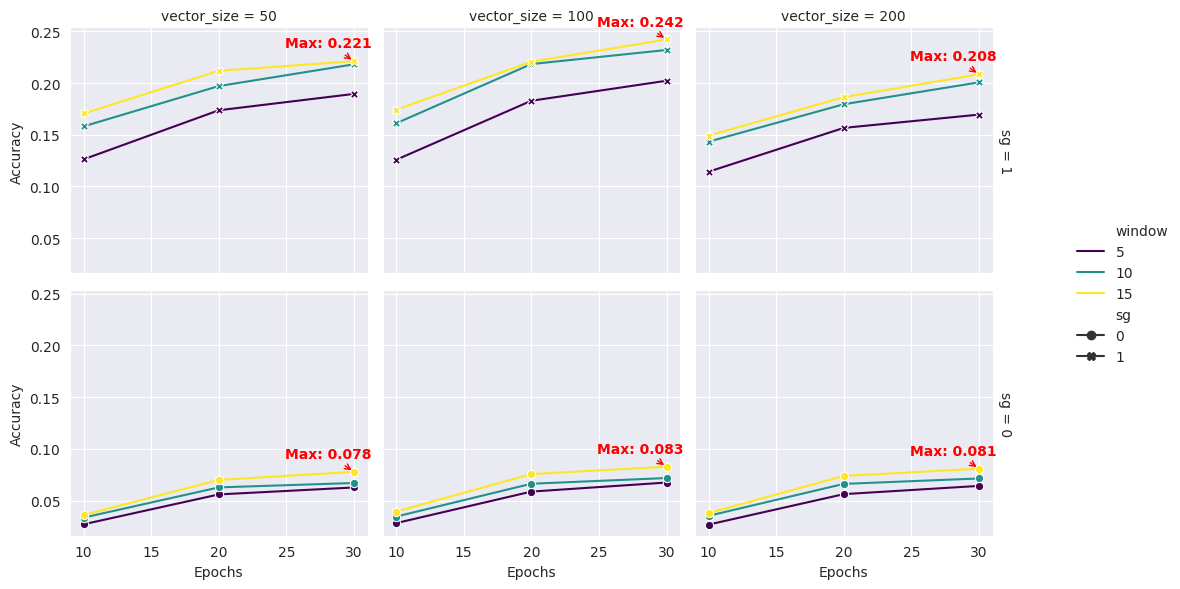

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the FULL data (including vector_size=200)
data = [
    {"vector_size": 50, "window": 5, "epochs": 10, "sg": 0, "accuracy": 0.027005281003112724},
    {"vector_size": 50, "window": 5, "epochs": 10, "sg": 1, "accuracy": 0.12616817233188943},
    {"vector_size": 50, "window": 5, "epochs": 20, "sg": 0, "accuracy": 0.055908313053162365},
    {"vector_size": 50, "window": 5, "epochs": 20, "sg": 1, "accuracy": 0.17365131457646024},
    {"vector_size": 50, "window": 5, "epochs": 30, "sg": 0, "accuracy": 0.06263633780896112},
    {"vector_size": 50, "window": 5, "epochs": 30, "sg": 1, "accuracy": 0.18948748189475045},
    {"vector_size": 50, "window": 10, "epochs": 10, "sg": 0, "accuracy": 0.033446851465738045},
    {"vector_size": 50, "window": 10, "epochs": 10, "sg": 1, "accuracy": 0.15806747740925528},
    {"vector_size": 50, "window": 10, "epochs": 20, "sg": 0, "accuracy": 0.06270757726162879},
    {"vector_size": 50, "window": 10, "epochs": 20, "sg": 1, "accuracy": 0.19706282438807876},
    {"vector_size": 50, "window": 10, "epochs": 30, "sg": 0, "accuracy": 0.06695365818881158},
    {"vector_size": 50, "window": 10, "epochs": 30, "sg": 1, "accuracy": 0.21811845234933525},
    {"vector_size": 50, "window": 15, "epochs": 10, "sg": 0, "accuracy": 0.03593317831378279},
    {"vector_size": 50, "window": 15, "epochs": 10, "sg": 1, "accuracy": 0.1705338725052582},
    {"vector_size": 50, "window": 15, "epochs": 20, "sg": 0, "accuracy": 0.06993601708285035},
    {"vector_size": 50, "window": 15, "epochs": 20, "sg": 1, "accuracy": 0.21183891765333662},
    {"vector_size": 50, "window": 15, "epochs": 30, "sg": 0, "accuracy": 0.07772616681051231},
    {"vector_size": 50, "window": 15, "epochs": 30, "sg": 1, "accuracy": 0.22113756165397172},
    {"vector_size": 100, "window": 5, "epochs": 10, "sg": 0, "accuracy": 0.028119125082732552},
    {"vector_size": 100, "window": 5, "epochs": 10, "sg": 1, "accuracy": 0.12569435896067696},
    {"vector_size": 100, "window": 5, "epochs": 20, "sg": 0, "accuracy": 0.058634812855855575},
    {"vector_size": 100, "window": 5, "epochs": 20, "sg": 1, "accuracy": 0.18282978137686995},
    {"vector_size": 100, "window": 5, "epochs": 30, "sg": 0, "accuracy": 0.06739727551640629},
    {"vector_size": 100, "window": 5, "epochs": 30, "sg": 1, "accuracy": 0.2022149804361095},
    {"vector_size": 100, "window": 10, "epochs": 10, "sg": 0, "accuracy": 0.03443164581983169},
    {"vector_size": 100, "window": 10, "epochs": 10, "sg": 1, "accuracy": 0.16101046532110178},
    {"vector_size": 100, "window": 10, "epochs": 20, "sg": 0, "accuracy": 0.06624119896929515},
    {"vector_size": 100, "window": 10, "epochs": 20, "sg": 1, "accuracy": 0.21833936264048254},
    {"vector_size": 100, "window": 10, "epochs": 30, "sg": 0, "accuracy": 0.0717673198786932},
    {"vector_size": 100, "window": 10, "epochs": 30, "sg": 1, "accuracy": 0.23198156086614435},
    {"vector_size": 100, "window": 15, "epochs": 10, "sg": 0, "accuracy": 0.039301323675871414},
    {"vector_size": 100, "window": 15, "epochs": 10, "sg": 1, "accuracy": 0.1741631150059105},
    {"vector_size": 100, "window": 15, "epochs": 20, "sg": 0, "accuracy": 0.07556326320257532},
    {"vector_size": 100, "window": 15, "epochs": 20, "sg": 1, "accuracy": 0.22059940776395434},
    {"vector_size": 100, "window": 15, "epochs": 30, "sg": 0, "accuracy": 0.08271415324336652},
    {"vector_size": 100, "window": 15, "epochs": 30, "sg": 1, "accuracy": 0.24214907005465192},
    {"vector_size": 200, "window": 5, "epochs": 10, "sg": 0, "accuracy": 0.026723269411830182},
    {"vector_size": 200, "window": 5, "epochs": 10, "sg": 1, "accuracy": 0.11421276354463},
    {"vector_size": 200, "window": 5, "epochs": 20, "sg": 0, "accuracy": 0.05617437811392638},
    {"vector_size": 200, "window": 5, "epochs": 20, "sg": 1, "accuracy": 0.1566032890123303},
    {"vector_size": 200, "window": 5, "epochs": 30, "sg": 0, "accuracy": 0.06415586516945368},
    {"vector_size": 200, "window": 5, "epochs": 30, "sg": 1, "accuracy": 0.1694631553232347},
    {"vector_size": 200, "window": 10, "epochs": 10, "sg": 0, "accuracy": 0.035194533766464295},
    {"vector_size": 200, "window": 10, "epochs": 10, "sg": 1, "accuracy": 0.1432776819042285},
    {"vector_size": 200, "window": 10, "epochs": 20, "sg": 0, "accuracy": 0.06609737010220035},
    {"vector_size": 200, "window": 10, "epochs": 20, "sg": 1, "accuracy": 0.17947960559763454},
    {"vector_size": 200, "window": 10, "epochs": 30, "sg": 0, "accuracy": 0.07133785389849265},
    {"vector_size": 200, "window": 10, "epochs": 30, "sg": 1, "accuracy": 0.20067968961712176},
    {"vector_size": 200, "window": 15, "epochs": 10, "sg": 0, "accuracy": 0.03790150948877062},
    {"vector_size": 200, "window": 15, "epochs": 10, "sg": 1, "accuracy": 0.14908600569348815},
    {"vector_size": 200, "window": 15, "epochs": 20, "sg": 0, "accuracy": 0.07377290453010892},
    {"vector_size": 200, "window": 15, "epochs": 20, "sg": 1, "accuracy": 0.18636275866358282},
    {"vector_size": 200, "window": 15, "epochs": 30, "sg": 0, "accuracy": 0.08081493740280712},
    {"vector_size": 200, "window": 15, "epochs": 30, "sg": 1, "accuracy": 0.20842610032168762},
]

df = pd.DataFrame(data, columns=["vector_size", "window", "epochs", "sg", "accuracy"])

# Create subplots for each vector_size and training algorithm
g = sns.relplot(
    data=df,
    x="epochs", y="accuracy",
    hue="window", style="sg",
    col="vector_size", row="sg",
    kind="line", markers=True, dashes=False,
    row_order=[1, 0],  # Ensures Skip-Gram (1) is on top
    facet_kws={"sharey": True, "margin_titles": True},
    height=3, aspect=1.2,  # Decrease height and width for smaller plots
    palette="viridis"  # Color-blind friendly
)

# Customize titles and labels
g.set_titles("Vector Size: {col_name} | Algorithm: {'Skip-Gram' if row_name else 'CBOW'}")
g.set_axis_labels("Epochs", "Accuracy")
g.tight_layout()

# Annotate maximum accuracy in each subplot
for ax in g.axes.flat:
    if not ax.lines: continue
    print([line.get_ydata() for line in ax.lines])
    max_acc = max([line.get_ydata()[-1] for line in ax.lines if len(line.get_ydata()) > 0])  # Get final epoch accuracy
    ax.annotate(
        f"Max: {max_acc:.3f}", 
        xy=(30, max_acc), 
        xytext=(-50, 10), textcoords="offset points",
        arrowprops=dict(arrowstyle="->", color="red"),
        color="red", fontweight="bold"
    )

output_path = "accuracy_plot.svg"  # Change the filename as needed
g.figure.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

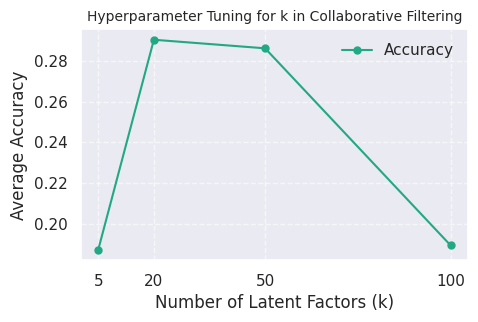

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme to match previous relplot style
sns.set_theme(style="darkgrid")

# Data
k_values = [5, 20, 50, 100]
accuracies = [0.1873, 0.2903, 0.2861, 0.1895]

# Create plot
fig, ax = plt.subplots(figsize=(5, 3))  # Same scale as your relplot

# Use a color from Seaborn's "viridis" palette (ensuring it matches previous plots)
color = sns.color_palette("viridis", 4)[-2]

# Line plot with markers
ax.plot(k_values, accuracies, marker="o", linestyle="-", color=color, markersize=5, label="Accuracy")

# Labels and title
ax.set_xlabel("Number of Latent Factors (k)")
ax.set_ylabel("Average Accuracy")
ax.set_title("Hyperparameter Tuning for k in Collaborative Filtering", fontsize=10)

# Customize grid (same as relplot)
ax.grid(True, linestyle="--", alpha=0.6)

# Ensure consistent tick label formatting
ax.set_xticks(k_values)

# Legend styling to match relplot
ax.legend(frameon=False, loc="upper right")

# Save figure in high quality
plt.savefig("k.svg", dpi=300, bbox_inches="tight")

# Show plot
plt.show()



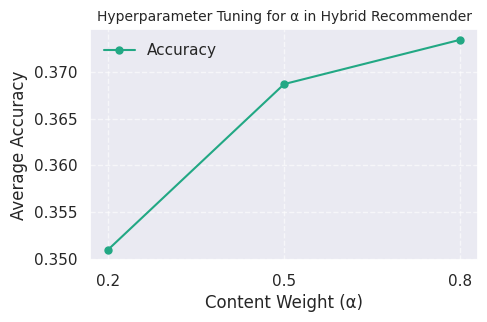

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style to match previous plots
sns.set_theme(style="darkgrid")

# Data
alpha_values = [0.2, 0.5, 0.8]
accuracies = [0.35098, 0.36869, 0.37343]

# Create plot
fig, ax = plt.subplots(figsize=(5, 3))  # Matches previous plots

# Use a color from Seaborn's "viridis" palette
color = sns.color_palette("viridis", 4)[-2]

# Line plot with markers
ax.plot(alpha_values, accuracies, marker="o", linestyle="-", color=color, markersize=5, label="Accuracy")

# Labels and title
ax.set_xlabel("Content Weight (α)")
ax.set_ylabel("Average Accuracy")
ax.set_title("Hyperparameter Tuning for α in Hybrid Recommender", fontsize=10)

# Consistent grid styling
ax.grid(True, linestyle="--", alpha=0.6)

# Set x-axis ticks explicitly
ax.set_xticks(alpha_values)

# Legend styling
ax.legend(frameon=False, loc="upper left")

# Save figure in high quality
plt.savefig("alpha.svg", dpi=300, bbox_inches="tight")

# Show plot
plt.show()



=== Top 10 Closest Tracks ===

#1: help (feat. Maejor)
  Artists: blackbear, Maejor
  Album: Help
  Track URI: spotify:track:0IHjY58S1OdnealEbadJQ1

#2: paragraphs
  Artists: blackbear
  Album: Help
  Track URI: spotify:track:49GFP1sA528wDMaDdQgwLo

#3: nervous
  Artists: blackbear
  Album: Help
  Track URI: spotify:track:0FkKoIRproCB2faGlpPtry

#4: different hos
  Artists: blackbear
  Album: Help
  Track URI: spotify:track:2Y4DwuII6ZzFZxmvD1s5o5

#5: oh lord
  Artists: blackbear
  Album: Help
  Track URI: spotify:track:1i6eoKAP8V6kVeW5FHxW8q

#6: verbatim
  Artists: blackbear
  Album: Help
  Track URI: spotify:track:3CEyM9wliTj7TeuuG84KZU

#7: Stampede
  Artists: YEAR OF THE OX
  Album: YOX EP
  Track URI: spotify:track:1WQJqbtfyvDaR4ktWKYVKP

#8: Pathetic
  Artists: Erik Hassle
  Album: Innocence Lost
  Track URI: spotify:track:3kC6803yj2CXjYsNDUkpLM

#9: 4u
  Artists: blackbear
  Album: Deadroses
  Track URI: spotify:track:1XcXhu1X0xBFMDFyq0b7Ue

#10: dirty laundry
  Artists: black

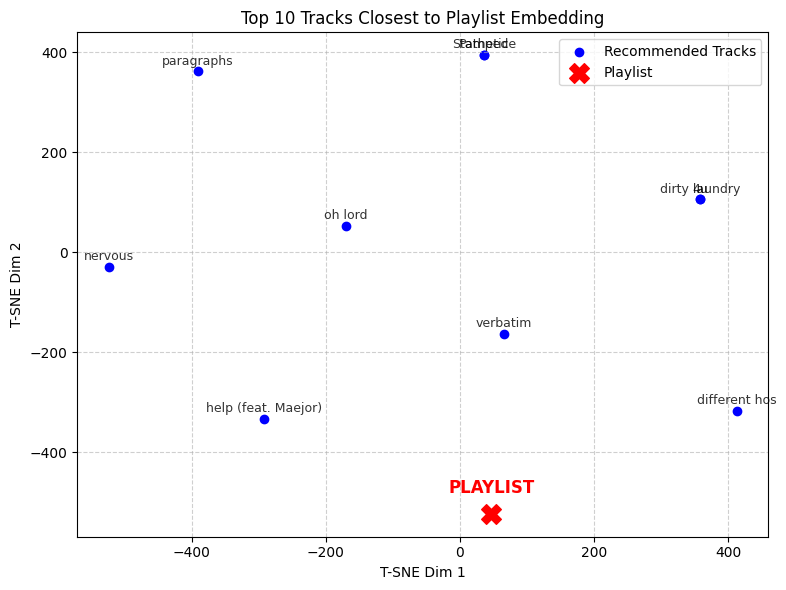

In [2]:
from adv_ml_music_recommendation.recommenders.hybridrecommender import HybridRecommender

recommender = HybridRecommender(df_playlist=df_playlist, df_tracks=df_tracks)

# Get the top 10 recommended tracks for a specific playlist
playlist_id = 10 # Replace with the playlist_id for which you want recommendations
top_k = 10  # Number of tracks to recommend

playlist_embedding = recommender.content_recommender.construct_playlist_embedding(playlist_id)
recommender.content_recommender.visualize_embedding(playlist_embedding)



=== Top 50 Closest Tracks ===

#1: Adrenaline Nightshift
  Artists: Japandroids
  Album: Celebration Rock
  Track URI: spotify:track:0sq6L0pQRdMCnQ5N76U4AJ

#2: Evil's Sway
  Artists: Japandroids
  Album: Celebration Rock
  Track URI: spotify:track:0cMeyVzzSstLgkxMBcu2G5

#3: Fire's Highway
  Artists: Japandroids
  Album: Celebration Rock
  Track URI: spotify:track:7pjyI9ulr1P3xR2JtFp3IG

#4: Ezekiel
  Artists: Pomegranates
  Album: Heaven
  Track URI: spotify:track:1SNJoL6GiMPlDfHjJTRTN2

#5: Heaven
  Artists: Pomegranates
  Album: Heaven
  Track URI: spotify:track:0pTvxZM3ffLXvLT8mBZgaR

#6: Younger Us
  Artists: Japandroids
  Album: Celebration Rock
  Track URI: spotify:track:5lLyaFsXQ2GASksFhGA9It

#7: Continuous Thunder
  Artists: Japandroids
  Album: Celebration Rock
  Track URI: spotify:track:1WTMcJpdYwVeXOaqG3X68E

#8: For the Love of Ivy
  Artists: Japandroids
  Album: Celebration Rock
  Track URI: spotify:track:7oAtwYnc4LQqjZYcCC5Yub

#9: The House That Heaven Built
  Artist

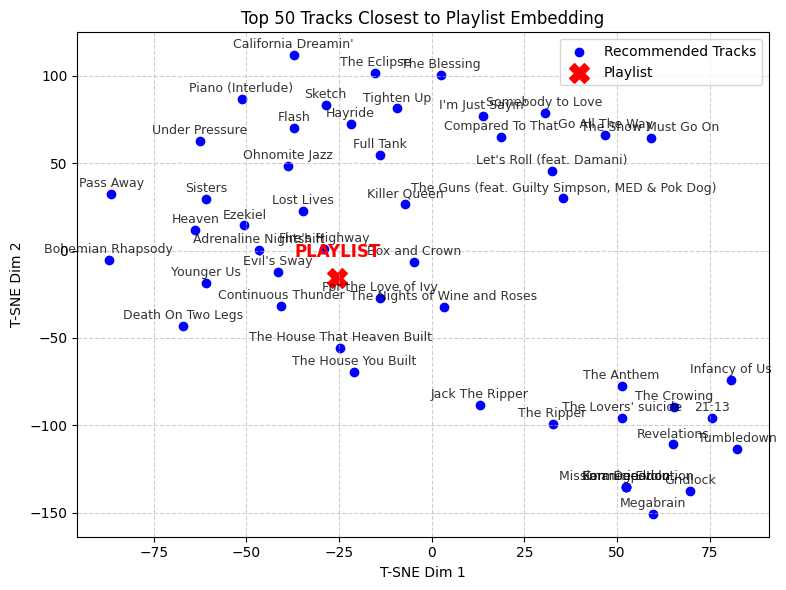

In [3]:
playlist_embedding = recommender.content_recommender.construct_playlist_embedding(30)
recommender.content_recommender.visualize_embedding(playlist_embedding, top_n=50)